# Introduction

Machine learning project for detecting fraudulent credit card transactions using the public dataset from **ULB (Université Libre de Bruxelles)**. This dataset is widely used for research on classification under highly imbalanced conditions.

* Objective

Build a classifier capable of identifying fraudulent transactions, even when they represent less than 0.2% of all records.

# Import Statements

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Data Load

In [20]:
#Load dataset
df = pd.read_csv('../data/raw/creditcard.csv')

# Data exploration and manipulation

In [21]:
# Count of fraud and non-fraud transactions
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


#### This dataset has 492 fraud transactions and 284315 non-fraud transactions. Making it an imbalanced problem. Although, the accuracy of the model is relevant to track the frauds.

In [23]:
# Split the dataset into training and testing sets, x being the training set and y being the testing set.
X = df.drop("Class", axis=1)
y = df["Class"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Splitting the dataset into training and testing sets, with a test size of 20% and 80% training size, acceptable size for a model.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Standardizing the data to have a mean of 0 and a standard deviation of 1.
# helps in improving the performance of the model.

In [26]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train_scaled, y_train)
# Simple logistic regression model, with a maximum of 1000 iterations and balanced class weights to handle the imbalance in the dataset.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
# Print the classification report to see the performance of the model.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



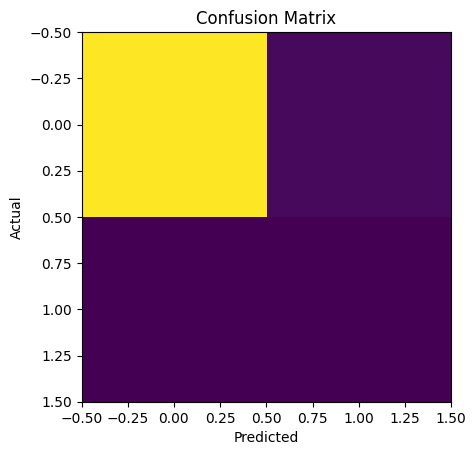

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Plot the confusion matrix to visualize the performance of the model.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
 # The closest to 1, the better the model performs.

Accuracy: 0.9755275446789088
Precision: 0.06097560975609756
Recall: 0.9183673469387755
F1 Score: 0.11435832274459974


# Conclusion


#### - This model shows that even though the precision is low, the recall is high, indicating that the model is good at identifying fraudulent transactions. However, the precision is low, indicating that the model is making a lot of false positives. This could be due to the imbalance in the dataset, where there are very few fraudulent transactions compared to non-fraudulent transactions. To improve the precision, we could try using techniques like oversampling the minority class or undersampling the majority class.

#### - Even with the large amount of false positives, catching a real fraud is possibly higher than a model that has lower amount of false positives.